<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_anomaly_detection_L327574471-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Network traffic anomaly detection (intrusion detection task)**


The purpose of this lab is to build a model at the interface of `NLP` and `Network Security` areas using `Intrusion detection evaluation dataset` (ISCXIDS2012) with helping frameworks & libraries.

After completing this lab, you will be able to:

1.  Quickly explore the Intrusion detection evaluation dataset and build the best model by the means of functional programming and layer-by-layer model description to solve Network Traffic Anomaly Detection task.
2.  Show different calculated metrics of the built model.
3.  Change values of some hyperparameters for model training process improving to achieve better results.
4.  Visualize the data analysis results with various plot types.


## Agenda


*   Theory and Methods
*   General part
    *   Import required libraries and dataset
    *   Some additional & preparative actions
    *   Reading the Dataset
    *   Dataset manipulation
    *   Main pipeline
*   Author


***


## Theory and Methods


The data that we are going to use for this is a subset of an open source default of `Intrusion detection evaluation dataset` (ISCXIDS2012) from the the Canadian Institute for Cybersecurity repository: [https://www.unb.ca/cic/datasets/ids.html](https://www.unb.ca/cic/datasets/ids.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_anomaly_detection_L327574471-2022-01-01). In order to download this dataset, you have to pass a short registration.

> The intend for this dataset is to assist various researchers in acquiring datasets of this kind for testing, evaluation, and comparison purposes, through sharing the generated datasets and profiles. The full research paper outlining the details of the dataset and its underlying principles. Please include this citation if you plan to use this database:

> Ali Shiravi, Hadi Shiravi, Mahbod Tavallaee, Ali A. Ghorbani, Toward developing a systematic approach to generate benchmark datasets for intrusion detection, Computers & Security, Volume 31, Issue 3, May 2012, Pages 357-374, ISSN 0167-4048, 10.1016/j.cose.2011.12.012.

During the work, you will know about the [anomaly detection task](https://en.wikipedia.org/wiki/Anomaly_detection?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_anomaly_detection_L327574471-2022-01-01) which is the main machine learning task solved by different algorithms correlating to the identification of rare items, events or observations which raise suspicions by differing significantly from the majority of the data. In essence, anomaly detection can be used as a tool for many other tasks, such as intrusion detection, fraud detection, fault detection, system health monitoring, event detection in sensor networks, detecting ecosystem disturbances, and defect detection in images using machine vision, etc.

Moreover, you will be provided `12` files of data. You should select one among them. Training some of them by `.fit` method takes a lot of time, so you can select not all the data files. In addition, you should select some values of hyperparameters in this Lab, and the Lab execution duration will depend on your choice.

Anomaly detection has three broad categories based on anomaly detection techniques: unsupervised, supervised and semi-supervised anomaly detection.

In addition, we will build the visualization of our results, exactly the obtained metrics (accuracy and loss) to choose the best model for further saving and predicting based on this saved model.


## Import required libraries and dataset


Alternative URL for downloading of the dataset.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/Advanced_ML_anomaly_detection_L3/DataSets.zip

--2023-12-26 00:38:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/Advanced_ML_anomaly_detection_L3/DataSets.zip
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402533304 (384M) [application/zip]
Saving to: ‘DataSets.zip’

DataSets.zip        100%[===================>] 383.88M  33.5MB/s    in 12s     

2023-12-26 00:38:42 (32.1 MB/s) - ‘DataSets.zip’ saved [402533304/402533304]



Import the necessary libraries to use in this lab. We can add some aliases (such as pd, plt, np, tf) to make the libraries easier to use in our code and set a default figure size for further plots. Ignore the warnings.


In [2]:
!pip install gensim
!pip install python-Levenshtein
!pip install tensorflow==2.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 56.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.8/170.8 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 84.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.7/394.7 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 75.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 62.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 13.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 80.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.0/462.0 kB 34.

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ElTree
import re, h5py, itertools, math, glob, zipfile, os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import log_loss, auc, roc_curve
from tensorflow.keras import layers
from keras.layers.core import Masking
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding, TimeDistributed
from keras.layers.wrappers import Bidirectional
from tensorflow.keras.models import Model, Sequential, load_model
from keras.utils import np_utils
from tensorflow.python.client import device_lib
from lxml import etree
from gensim.models import Word2Vec

# %matplotlib inline
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('ggplot')
seed = 42

import warnings
warnings.filterwarnings(action = "ignore")

2023-12-26 00:39:59.998178: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-26 00:39:59.998251: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
Using TensorFlow backend.


## Some additional & preparative actions


Specify the value of the `precision` parameter equal to 3 to display three decimal signs (instead of 6 as default).


In [4]:
pd.set_option("precision", 3)
pd.options.display.float_format = '{:.3f}'.format

Add some functions and one class that you will need further.


In [5]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'accuracy' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'accuracy' in s and 'val' in s]
    
    plt.figure(figsize = (12, 5), dpi = 100)
    COLOR = 'gray'
    
    plt.rc('legend', fontsize = 14)   # legend fontsize
    plt.rc('figure', titlesize = 12)  # fontsize of the figure title
        
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1, len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.subplot(1, 2, 1)
    plt.subplots_adjust(wspace = 2, hspace = 2)
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.titlecolor'] = 'black'
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b-o',
                 label = 'Train (' + str(str(format(history.history[l][-1],'.4f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g',
                 label = 'Valid (' + str(str(format(history.history[l][-1],'.4f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend(facecolor = 'gray', loc = 'best')
    plt.grid(True)
    plt.tight_layout()
    
    ## Accuracy
    plt.subplot(1, 2, 2)
    plt.subplots_adjust(wspace = 2, hspace = 2)
    plt.rcParams['text.color'] = 'black'
    plt.rcParams['axes.titlecolor'] = 'black'
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b-o',
                 label = 'Train (' + str(format(history.history[l][-1],'.4f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g',
                 label = 'Valid (' + str(format(history.history[l][-1],'.4f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(facecolor = 'gray', loc = 'best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

class B_Generator(object):
    def __init__(self, BZ, XX, YY, ohe):
        self.BZ = BZ
        self.n_b = int(math.floor(np.shape(XX)[0] / BZ))
        self.b_index = [a * BZ for a in range(0, self.n_b)]
        self.XX = XX
        self.YY = YY
        self.ohe = ohe
        
    def __iter__(self):
        for var_0 in itertools.cycle(self.b_index):
            YY = self.YY[var_0 : (var_0 + self.BZ)]
            ohe_Y = self.ohe.transform(YY.reshape(len(YY), 1))
            yield (self.XX[var_0 : (var_0 + self.BZ),], ohe_Y)

## Reading the Dataset


In this section, you will unzip only `1(one)` file from the archive with datasets using its number that you will enter below.

The file number has to be in a range from `0` to `11`, because this archive has `12` files for your experiments, but you need to choose only `1 (one)`.

Replace (input a file number in a ZIP archive) `##YOUR CODE GOES HERE##` with your Python code.


In [6]:
number = 4

if zipfile.is_zipfile('DataSets.zip'):
  file_1 = zipfile.ZipFile('DataSets.zip', 'r')
else:
  print('Type file isn`t ZIP')

name_dataset = file_1.namelist()[number]
file_1.extract(name_dataset)
print("File", name_dataset, "has been read")

File TestbedThuJun17-2Flows.xml has been read


## Dataset manipulations


This code section will help us to make the following actions:

1.  parse the unzipped file of the dataset from XML
2.  convert it to `DataFrame` to make it more convenient to use
3.  delete some redundant columns from the `DataFrame`
4.  check this `DataFrame` for data duplicates
5.  sort the values of the dataset
6.  add two additional columns
7.  rename the columns which have quite long names


In [7]:
tree_set = ElTree.parse(name_dataset)
root_tree_set = tree_set.getroot()

result = []
var_1 = root_tree_set.items()[0][1][:-4]

for item in root_tree_set.findall(var_1):
    result.append({node.tag: node.text for node in item.getiterator()})

dSET = pd.DataFrame(result)
dSET = dSET.drop(dSET.columns[[0]], axis = 1)
dSET = dSET.drop_duplicates()

dSET = dSET.sort_values('startDateTime')
dSET['IPs_sequence'] = dSET['source'] + '_' + dSET['destination'] + '_' + dSET['startDateTime'].str[:13]

dSET['res_port'] = np.where(dSET.destinationPort <= dSET.sourcePort,
                            dSET['destinationPort'],
                            dSET['sourcePort'])

# rename some of the columns for more convenience
dSET = dSET.rename(columns = {'totalSourceBytes': 'totSB',
                        'totalDestinationBytes': 'totDB',
                        'totalDestinationPackets': 'totDP',
                        'totalSourcePackets': 'totSP',
                        'sourcePayloadAsBase64': 'sourB64',
                        'sourcePayloadAsUTF': 'sourUTF',
                        'destinationPayloadAsBase64': 'destB64',
                        'destinationPayloadAsUTF': 'destUTF',
                        'direction': 'direct',
                        'sourceTCPFlagsDescription': 'sourTCPFd',
                        'destinationTCPFlagsDescription': 'destTCPFd',
                        'protocolName': 'pName',
                        'sourcePort': 'sPort',
                        'destination': 'dest',
                        'destinationPort': 'dPort'})
print("Preparation process has been finished")

Preparation process has been finished


### Let's look at the dataset size & feature names


In [8]:
dSET.shape, dSET.columns

((149625, 22),
 Index(['appName', 'totSB', 'totDB', 'totDP', 'totSP', 'sourB64', 'sourUTF',
        'destB64', 'destUTF', 'direct', 'sourTCPFd', 'destTCPFd', 'source',
        'pName', 'sPort', 'dest', 'dPort', 'startDateTime', 'stopDateTime',
        'Tag', 'IPs_sequence', 'res_port'],
       dtype='object'))

The dataset contains a lot of objects (rows) depending on a selected file, for each of which `20` features are set (columns), including 1 target feature (`Tag`) and two additional columns (`IPs_sequence` and `res_port`).


Input features (column names):

1.  `appName` - name of the application that participated in this data collection.
2.  `totalSourceBytes`, `totSB` - the amount of data received in bytes from Source.
3.  `totalDestinationBytes`, `totDB` - the amount of data sent in bytes to Destination.
4.  `totalDestinationPackets`, `totDP` - the amount of data sent in packets to Destination.
5.  `totalSourcePackets`, `totSP` - the amount of data received in packets from Source.
6.  `sourcePayloadAsBase64`, `sourB64` - source payload in Base64 code.
7.  `sourcePayloadAsUTF`, `sourUTF` - source payload in another UTF-8 (Unicode Transformation Format) 8-bit code.
8.  `destinationPayloadAsBase64`, `destB64` - destination payload in Base64 code.
9.  `destinationPayloadAsUTF`, `destUTF` – destination payload in another UTF-8 (Unicode Transformation Format) 8-bit code.
10. `direction`, `direct` - data transferring direction, for instance, local-to-local (`L2L`), local-to-remote (`L2R`), remote-to-local (`R2L`), remote-to-remote (`R2R`).
11. `sourceTCPFlagsDescription`, `sourTCPFd` - sources description of the TCP flags, for instance, `ACKnowledgement`, `A`: flag is used to acknowledge the successful receipt of packets; `Push`, `P` flag, like the `Urgent flag`: exists to ensure that the data is given the priority (that it deserves) and is processed at the sending or receiving end; `Final`, `F` flag: available is the FIN flag, standing for the word FINished, etc.
12. `destinationTCPFlagsDescription`, `destTCPFd` - destination description of the TCP flags, description see above.
13. `source` – source IP-address.
14. `protocolName`, `pName` – name of used protocol.
15. `sourcePort`, `sPort` – number of source port.
16. `desctination`, `dest` – destination IP-address.
17. `desctinationPort`, `dPort` – number of destination port.
18. `startDateTime`, `stopDateTime` – date & time of start and stop of data collection process.
19. `Tag` – a feature (desired target) value that will be used for prediction.


Let's read the data and look at the first 5 rows using the `head` method. The number of the output rows from the dataset is determined by the `head` method parameter.

Replace `##YOUR CODE GOES HERE##` with your Python code.


In [9]:
##YOUR CODE GOES HERE##
dSET.head(5)

,appName,totSB,totDB,totDP,totSP,sourB64,sourUTF,destB64,destUTF,direct,...,source,pName,sPort,dest,dPort,startDateTime,stopDateTime,Tag,IPs_sequence,res_port
4205,FTP,38208,1534597,1084,597,None,None,None,None,L2R,...,192.168.2.109,tcp_ip,1263,209.132.183.62,14006,2010-06-17T08:48:36,2010-06-17T09:06:26,Normal,192.168.2.109_209.132.183.62_2010-06-17T08,1263
3955,FTP,85952,3603138,2541,1343,None,None,None,None,L2R,...,192.168.2.109,tcp_ip,1263,209.132.183.62,14006,2010-06-17T08:48:36,2010-06-17T09:05:59,Normal,192.168.2.109_209.132.183.62_2010-06-17T08,1263
1114,FTP,91392,3803076,2682,1428,None,None,None,None,L2R,...,192.168.2.109,tcp_ip,1263,209.132.183.62,14006,2010-06-17T08:48:36,2010-06-17T09:00:59,Normal,192.168.2.109_209.132.183.62_2010-06-17T08,1263
3496,FTP,108288,4575886,3227,1692,None,None,None,None,L2R,...,192.168.2.109,tcp_ip,1263,209.132.183.62,14006,2010-06-17T08:48:36,2010-06-17T09:04:59,Normal,192.168.2.109_209.132.183.62_2010-06-17T08,1263
2223,FTP,116224,4852396,3422,1816,None,None,None,None,L2R,...,192.168.2.109,tcp_ip,1263,209.132.183.62,14006,2010-06-17T08:48:36,2010-06-17T09:02:59,Normal,192.168.2.109_209.132.183.62_2010-06-17T08,1263


## Main pipeline


### I stage. Keys building.


Here you will build a set of keys by several columns and with the help of `groupby` method. Thus, we will count the number of unique attacks and form a sequence for the further research. Moreover, we will select one port by a boundary `10000` (i.e. if the port number is less than 10 000) and will use it in the method `groupby`.


In [10]:
## Build the sets (keys and sequences) in hour slices
print("Stage I. Keys building\n")
key = dSET.groupby('IPs_sequence')[['Tag', 'res_port']].agg({"Tag": lambda var_2: "%s" % ','.join([var_3 for var_3 in var_2]),
          "res_port" :lambda var_2: "%s" % ','.join([str(var_3) if int(var_3) < 10000 else "10000" for var_3 in var_2])})

print("Unique keys:\n" + str(key.count()))
attacks = [var_4.split(",") for var_4 in key.Tag.tolist()]
sequences = [var_4.split(",") for var_4 in key.res_port.tolist()]

Stage I. Keys building

Unique keys:
Tag         7261
res_port    7261
dtype: int64


### II stage. Label encoding.


On this stage, you will form two sets: the number of unique tokens for the labels encoding process and the number of sequences. After this step, we will collapse our sequences into one sequence by the method `zip`.


In [11]:
print("Stage II. Label encoding\n")
U_tokens = list(set([var_5 for var_6 in sequences for var_5 in var_6]))
print("Number of unique tokens :", len(U_tokens))
LE = LabelEncoder().fit(U_tokens)
sequences = [LE.transform(var_7).tolist() for var_7 in sequences]
sequences = [[var_6 + 1 for var_6 in var_5] for var_5 in sequences]
print("Number of sequences :", len(sequences))
sequence_attack = zip(attacks, sequences)

Stage II. Label encoding

Number of unique tokens : 4064
Number of sequences : 7261


### III stage. Sequences generating for the future model.


On this stage, you will form some additional sets which we can use to form standard X & Y sets for the further training process of our neuronet. Also, we set the size of the primary sequence.

By the help of the input number that you will enter below, you will define the size of the primary sequence. The number has to be in the range from `10` to `20`, you can pick up the best value to obtain the best model.

Replace `##YOUR CODE GOES HERE##` with your Python code.


In [12]:
print("Stage III. Sequences generating for the future model\n")
var_8 = np.float32(0)
len_sequence = 14
print("Length of the primary sequence :", len_sequence)
seq_IDX, seq_X, seq_Y, seq_ATT = [], [], [], []
for var_10, (var_11, var_12) in enumerate(sequence_attack):
    sequence_1 = [np.float32(0)] * (len_sequence) + var_12
    sequence_2 = [np.float32(0)] * (len_sequence) + var_11
    for var_9 in range(len_sequence, len(sequence_1)):
        sequence_3 = sequence_1[(var_9 - len_sequence):(var_9)]
        var_14 = []
        for var_13 in sequence_3:
            try:
                var_14.append(var_13)
            except:
                var_14.append(var_8)
        seq_X.append(var_14)
        seq_Y.append(sequence_1[var_9])
        seq_IDX.append(var_10)
        seq_ATT.append(sequence_2[var_9])
print("Length of X & Y sets :", len(seq_X))

Stage III. Sequences generating for the future model

Length of the primary sequence : 14
Length of X & Y sets : 149625


### IV stage. One-hot-encoder initializing.


This section is dedicated to one-hot encoding. The advantage of `One-Hot-Encoding` is that the result is `binary`, not ordinal, and that everything is in orthogonal vector space. The downside is that the space can quickly explode for high power of the function and you start to fight the `curse of dimensionality`. By default, `OneHotEncoder` converts the data to a sparse matrix so as not to waste memory on storing numerous zeroes.


In [13]:
print("Stage IV. One-hot-encoder initializing\n")
OHE = OneHotEncoder(sparse = False, categories = 'auto').fit(np.unique(seq_Y).reshape(-1, 1))

X = np.array(seq_X)
print("Dimensionality size of set X :", X.shape)

Stage IV. One-hot-encoder initializing

Dimensionality size of set X : (149625, 14)


### V stage. Model building.


You are to create your own model at this stage.

The first layer of the model is `Embedding` layer, which can be used to create `dense` encoding of words (in our case it's `100` words) based on the input size of the defined vocabulary (in our case it's `number of unique tokens + 1`). Typically, sparse and dense word encodings denote coding efficiency.

Further, we use a few (you can change this number) pairs of layers: `bidirectional LSTM` & `Dropout`. You can choose the number of layers pairs yourself.

Using `bidirectional LSTM` will run your input in two ways: one from the past to the future and one from the future to the past (backwards). This distinguishes this approach from `unidirectional LSTM` which works in the opposite direction so you save information from the future. Thus, by using the two hidden states together, you can save information from both the past and the future at any time.

`Dropout` [layer](https://arxiv.org/abs/1207.0580?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_anomaly_detection_L327574471-2022-01-01) is used in neural networks to solve the problem of overfitting. Networks for training are obtained by dropping out neurons with probability `p`, so the probability that a neuron will remain in the network is `1 - p`.

`Dense` layer is an ordinary tightly bonded layer of the neural network, where each neuron is connected to all inputs.

Replace `##YOUR CODE GOES HERE##` with your Python code.


In [14]:
print("Stage V. Model building\n")
drop_level = 0.35 # You can choose a drop level yourself
N_neurons = 50   # You can choose the number of neurons yourself

model = Sequential()
model.add(layers.Embedding(output_dim = 100,
                    input_dim = len(U_tokens) + 1,
                    mask_zero = True))

model.add(layers.Bidirectional(LSTM(N_neurons, return_sequences = True)))
model.add(layers.Dropout(drop_level))

# model.add(layers.Bidirectional(LSTM(N_neurons, activation = "relu", return_sequences = False))
# model.add(layers.Dropout(drop_level))

model.add(layers.Bidirectional(LSTM(N_neurons, activation = "relu", return_sequences = False)))
model.add(layers.Dropout(drop_level))

model.add(layers.Dense(N_neurons, activation = "linear"))
model.add(layers.Dropout(drop_level))

model.add(layers.Dense(len(U_tokens), activation = "softmax"))

model.summary()

Stage V. Model building



2023-12-26 00:47:10.932059: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-12-26 00:47:10.933310: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-12-26 00:47:10.933354: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-12-26 00:47:10.933401: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyterlab-jcontrerasgc): /proc/driver/nvidia/version does not exist
2023-12-26 00:47:10.934047: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX512F
To enable them in other operations, rebuild TensorFlow w

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         406500    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 100)         60400     
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100)               60400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0

### VI stage. Model compiling & fitting.


This stage allows you to train your model, but firstly, you should set some hyperparameters & other variable values, such as `batch size`, the number of `epochs` for training, the types of `optimizer` & `loss` function. You can change all or a part of them during your research. Fitting process takes some time.

Replace `##YOUR CODE GOES HERE##` with your Python code.


In [15]:
print("Stage VI. Compile and fit the model\n")

batch_size = 512  # You can choose a batch size yourself
n_epochs = 10     # You can choose the number of epochs yourself

optim = tf.keras.optimizers.Nadam()   # You can choose an optimizer yourself
loss_f = tf.keras.metrics.categorical_crossentropy

T_data = B_Generator(batch_size, np.asarray(X), np.asarray(seq_Y), OHE)

model.compile(loss = loss_f,
              optimizer = optim,
              metrics = ['accuracy'])

history = model.fit_generator(T_data.__iter__(),
    steps_per_epoch = T_data.n_b,
    epochs = n_epochs,
    verbose = 1)

Stage VI. Compile and fit the model

Epoch 1/10


2023-12-26 00:47:45.615513: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-12-26 00:47:45.616131: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2394310000 Hz


292/292 [==============================] - 224s 735ms/step - loss: 8.1431 - accuracy: 0.1527
Epoch 2/10
292/292 [==============================] - 211s 722ms/step - loss: 6.7271 - accuracy: 0.0794
Epoch 3/10
292/292 [==============================] - 210s 718ms/step - loss: 6.5159 - accuracy: 0.0773
Epoch 4/10
292/292 [==============================] - 207s 709ms/step - loss: 6.0909 - accuracy: 0.1840
Epoch 5/10
292/292 [==============================] - 218s 745ms/step - loss: 5.8303 - accuracy: 0.2172
Epoch 6/10
292/292 [==============================] - 216s 740ms/step - loss: 5.5429 - accuracy: 0.2260
Epoch 7/10
292/292 [==============================] - 215s 736ms/step - loss: 5.3194 - accuracy: 0.2254
Epoch 8/10
292/292 [==============================] - 212s 725ms/step - loss: 5.1472 - accuracy: 0.2255
Epoch 9/10
292/292 [==============================] - 211s 723ms/step - loss: 4.9856 - accuracy: 0.2283
Epoch 10/10
292/292 [==============================] - 212s 726ms/step - lo

If you want to obtain better training results, then you should set more `epochs`, for instance, equal to 100 or more. However, this case requires more time.


### VII stage. Results visualization.


You see the results of training for the loss & accuracy.

Replace `##YOUR CODE GOES HERE##` with your Python code.


Stage VII. Results visualization



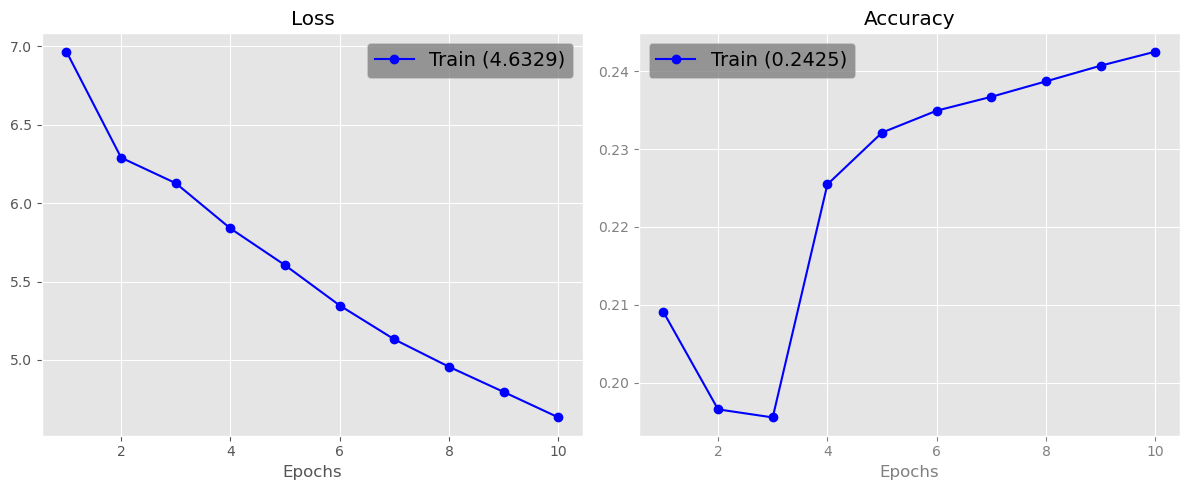

In [16]:
print("Stage VII. Results visualization\n")
plot_history(history)

If you can see a reduction of the values for the `loss` distribution, and if you see an increase of the values for the `accuracy`, then it's a good sign. It means your model training goes in the right way.

Thus, the main goal has been reached.


### VIII stage. Model saving & prediction checking.


We still have two steps to do. The first is to save our trained model so that we can use it in the further research. The second is to check our saved model and try to make a prediction.

You can enter any name of your model for saving, but make sure that it is in quotes.

Replace `##YOUR CODE GOES HERE##` with your Python code.


In [17]:
print("Stage VIII. Model saving & prediction checking\n")

M_name = "My_model"

filepath = M_name + '.h5'
tf.keras.models.save_model(model, filepath, include_optimizer = True, save_format = 'h5', overwrite = True)
print("Size of the saved model :", os.stat(filepath).st_size, "bytes")

Stage VIII. Model saving & prediction checking

Size of the saved model : 8962872 bytes


In addition, you can see the size of your model. At the same time, we could save our model as one file (in `.h5` format) with the help of `Tensorflow` backend, which could make it more convenient to use further.

Replace `##YOUR CODE GOES HERE##` with your Python code.


In [21]:
model_L = tf.keras.models.load_model(tf.keras.models.Load_model(labs/Advanced_ML_anomaly_detection_L3/My_model.h5)
predicts = model_L.predict(X, batch_size = batch_size)
print("Dimensionality sizes of model predicts :", predicts.shape, "\n")
print("Compare with length of X & Y sets :\t", len(seq_X), "\nand with number of tokens :\t\t", len(U_tokens))

SyntaxError: invalid syntax (1634633630.py, line 2)

Double-click **here** for the solution.

<!-- 
model_L = tf.keras.models.load_model(filepath)
-->


## Author


[Sergii Kavun](https://www.linkedin.com/in/sergii-kavun/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsAdvanced_ML_anomaly_detection_L327574471-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description   |
| ----------------- | ------- | ------------- | -------------------- |
| 2021-07-10        | 1.0     | Kavun, Sergii | Code improving       |
| 2021-06-21        | 0.21    | Kavun, Sergii | Code refactoring     |
| 2021-06-14        | 0.2     | Kavun, Sergii | Translate to English |
| 2021-06-12        | 0.1     | Kavun, Sergii | Created Lab          |


Copyright © 2021 IBM Corporation. All rights reserved.
